In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
path = "/Users/yifuhe/Learning/RBS/data_mining/iris/"
data = pd.read_csv(path+"iris.data",header=None)
data.columns=["sepal_length","sepal_width", "petal_length", "petal_width", "class"]
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## histogram

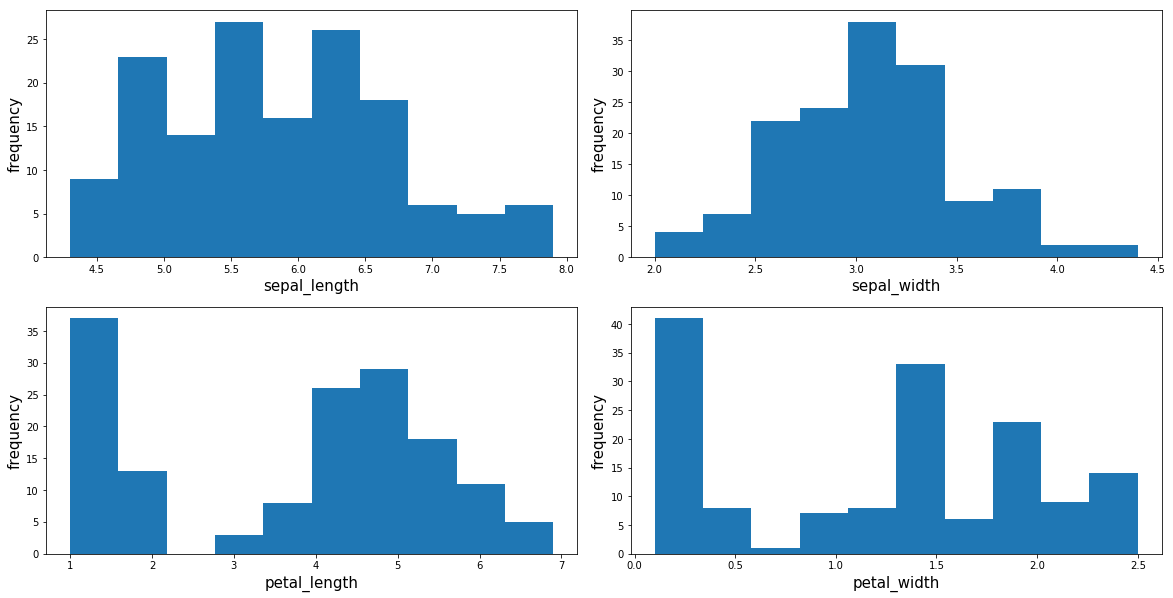

In [3]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(data["sepal_length"],bins=10)
ax1.set_xlabel('sepal_length',size=15)
ax1.set_ylabel('frequency',size=15)


    
ax2.hist(data["sepal_width"],bins=10)
ax2.set_xlabel('sepal_width',size=15)
ax2.set_ylabel('frequency',size=15)


ax3.hist(data["petal_length"],bins=10)
ax3.set_xlabel('petal_length',size=15)
ax3.set_ylabel('frequency',size=15)


ax4.hist(data["petal_width"],bins=10)
ax4.set_xlabel('petal_width',size=15)
ax4.set_ylabel('frequency',size=15)
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()
plt.close(fig) 


## 3D-histogram

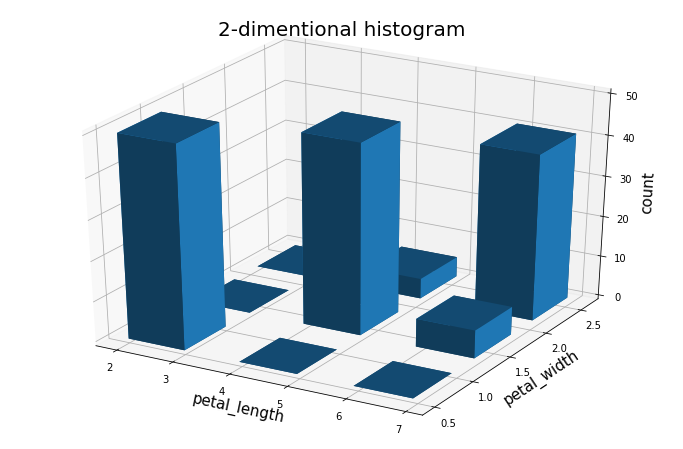

In [4]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x,y = data["petal_length"],data["petal_width"]
hist, xedges, yedges = np.histogram2d(x, y, bins=3, range=[[x.min(), x.max()], [y.min(), y.max()]])

# Construct arrays with the dimensions for the 9 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + (xedges[1]-xedges[0])/2, yedges[:-1] + (yedges[1]-yedges[0])/2)
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = 1 * np.ones_like(zpos)
dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xlabel("petal_length",size = 15)
ax.set_ylabel("petal_width",size = 15)
ax.set_zlabel("count",size = 15)
ax.set_title("2-dimentional histogram",size=20)
plt.show()
plt.close(fig) 



## Box Plot

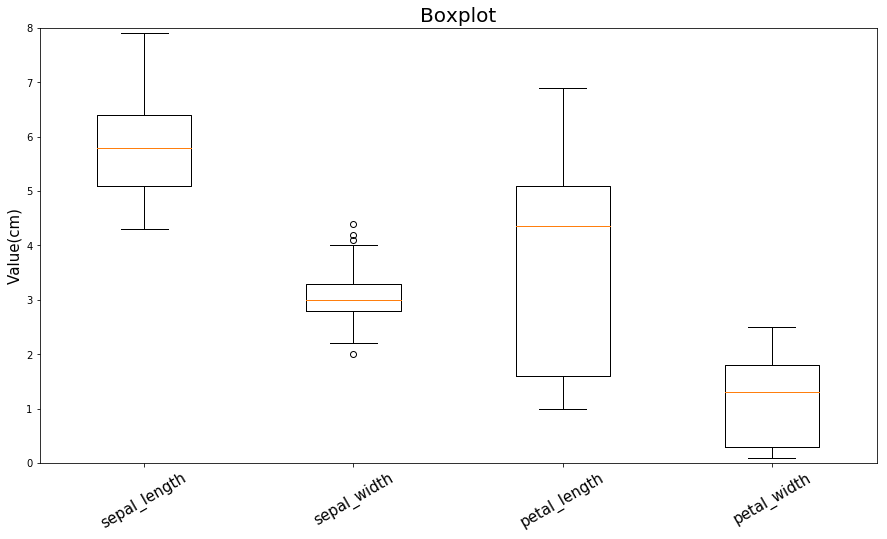

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)


ax.boxplot([data["sepal_length"], data["sepal_width"], data["petal_length"], data["petal_width"]])
ax.set_ylim(0.005,8)
ax.set_title("Boxplot",size=20)
ax.set_ylabel('Value(cm)',size = 15)
ax.set_xticklabels(data.columns[:-1],size = 15, rotation=30)

plt.show()
plt.close(fig)

## Pair plot

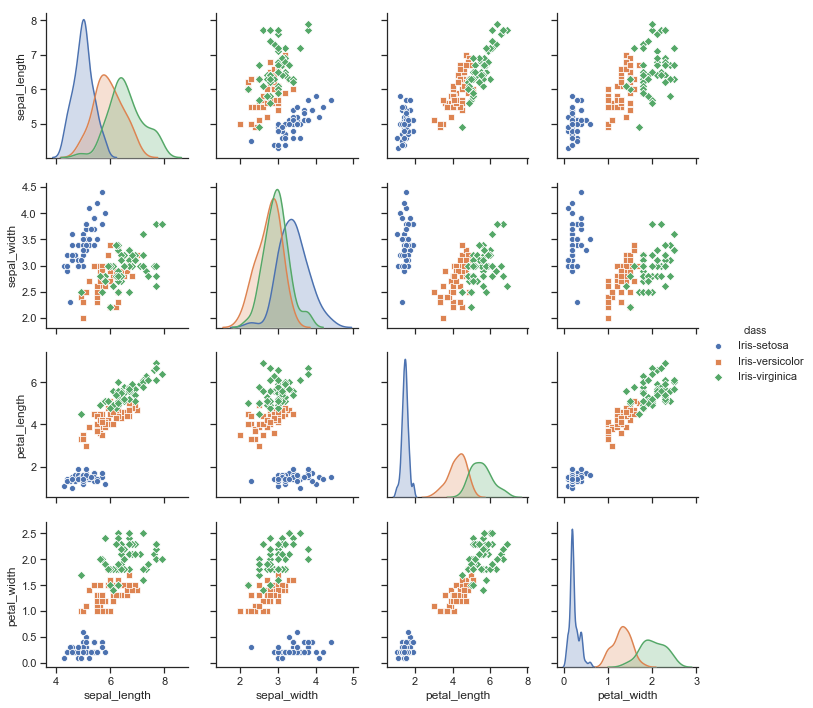

In [6]:
sns.set(style="ticks")
sns.pairplot(data, hue="class",markers=["o", "s", "D"])

## Similarity plot & correlation matrix

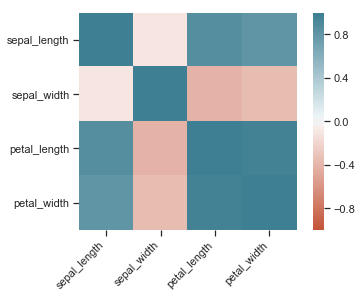

In [7]:
data[data["class"] == "Iris-setosa"]["sepal_length"]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [287]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### compare classification error rate, Gini index and Cross-Entropy

In [12]:
misclass = lambda x: 1-max(x,1-x)
gini = lambda x: 1-x**2-(1-x)**2
entropy = lambda x: -x*np.log(x) - (1-x)*np.log(1-x)
x = pd.Series(np.arange(0,1.01,0.01))
Misclass = x.apply(misclass)
Gini = x.apply(gini)
Entropy = x.apply(entropy)

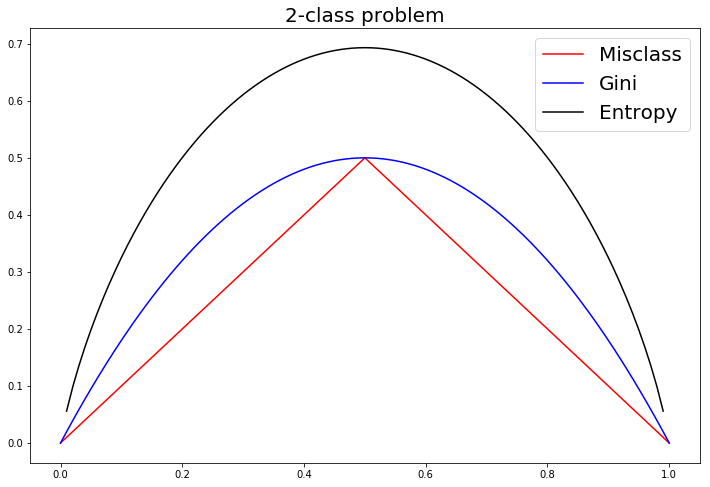

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,Misclass,color = 'red')
ax.plot(x,Gini,color = 'blue')
ax.plot(x,Entropy,color = 'black')
ax.legend(["Misclass","Gini","Entropy"],fontsize = 20)
ax.set_title("2-class problem",fontsize = 20)
plt.show()
plt.close(fig)

In [17]:
np.log(20)

2.995732273553991

In [10]:
gini(0.25)*0.2+gini(1)*0.4+gini(0.125)*0.4

0.16250000000000003

In [11]:
gini(7/16)*0.8+gini(0.25)*0.2

0.46875000000000006

In [6]:
pd.series(["C0"]*10+["C1"]*10)

AttributeError: module 'pandas' has no attribute 'series'